De acordo com o nosso atual modelo cosmológico baseado na relatividade geral de Einstein, precisamos de dois parâmetros para estimar a idade do nosso universo: a notória constante de Hubble(H0), que fornece a taxa de expansão do universo, e o Ωm, parâmetro de densidade da matéria do universo. Além disso, temos o modelo matemático definido pela integral da função A(x, omega) abaixo. Vamos visualizar o gráfico da idade do universo para 100 valores de Ωm.

In [183]:
# bibliotecas utilizadas
import numpy as np 
from scipy import integrate 
import matplotlib.pyplot as plt

In [184]:
# função utilizada na integral de A
def E(x, omega):
    return np.sqrt(omega * (1+x)**3 + 1 - omega) 
    

In [185]:
# função a ser integrada
def A(x, omega):
    return 1/((1+x) * E(x, omega))


In [186]:
# integração
def integrating(omega):
    I = integrate.quad(A, 0, np.inf, args=(omega))
    return I
 

In [187]:
# cáculo de conversão para giga-ano
def to_year():
    H0 = 67.8
    """Para transformar a unidade de 1/H0 de s*Mpc/Km para y(anos) iremos fazer uma série de multiplicações.
       As multiplicações abaixo correspondem as seguintes unidades:
         s*Mpc/Km *  pc/Mpc *      Km/pc     * min/s * hr/min * d/hr * y/d """
    return 1/H0   * 10**6/1 * 3.086*10**13/1 * 1/60  *  1/60  * 1/24 * 1/365

In [188]:
def main():
    omega = 0.308 # está entre 0.296 e 0.32
    result, error = integrating(omega)
    print("Resultado da integração: ", result)
    print("Erro: ", error)
    
    hubble_const = to_year()
    hubble_const *= 10**-9 # aproximando em giga anos
    print(hubble_const)
    
    age_universe = hubble_const * result
    print(age_universe, "giga-anos")
    
    d_omega = np.linspace(0.15, 0.45, 100)
    print(d_omega)

    a = np.array([]) 
    
    print(a)

    for i in d_omega:
        result, error = integrating(i)
        age_universe = hubble_const * result
        a = np.append(a, age_universe)

    print(a)

    # gráfico
    plt.figure(figsize=(10,7))
    plt.plot(d_omega, a, color='red', linewidth=3, alpha=0.8)
    plt.style.use('ggplot')
    plt.title("Idade do universo para 100 valores de Ωm", fontsize=16, fontstyle='italic')
    plt.xlabel("Ωm (Densidade total de matéria)", fontsize=14)
    plt.ylabel("Idade do universo (em bilhões de anos)", fontsize=14)
    plt.tight_layout()
    plt.show()

Resultado da integração:  0.9570158532200209
Erro:  2.726152636967072e-12
14.43310000912943
13.812705519846892 giga-anos
[0.15       0.1530303  0.15606061 0.15909091 0.16212121 0.16515152
 0.16818182 0.17121212 0.17424242 0.17727273 0.18030303 0.18333333
 0.18636364 0.18939394 0.19242424 0.19545455 0.19848485 0.20151515
 0.20454545 0.20757576 0.21060606 0.21363636 0.21666667 0.21969697
 0.22272727 0.22575758 0.22878788 0.23181818 0.23484848 0.23787879
 0.24090909 0.24393939 0.2469697  0.25       0.2530303  0.25606061
 0.25909091 0.26212121 0.26515152 0.26818182 0.27121212 0.27424242
 0.27727273 0.28030303 0.28333333 0.28636364 0.28939394 0.29242424
 0.29545455 0.29848485 0.30151515 0.30454545 0.30757576 0.31060606
 0.31363636 0.31666667 0.31969697 0.32272727 0.32575758 0.32878788
 0.33181818 0.33484848 0.33787879 0.34090909 0.34393939 0.3469697
 0.35       0.3530303  0.35606061 0.35909091 0.36212121 0.36515152
 0.36818182 0.37121212 0.37424242 0.37727273 0.38030303 0.38333333
 0.386363

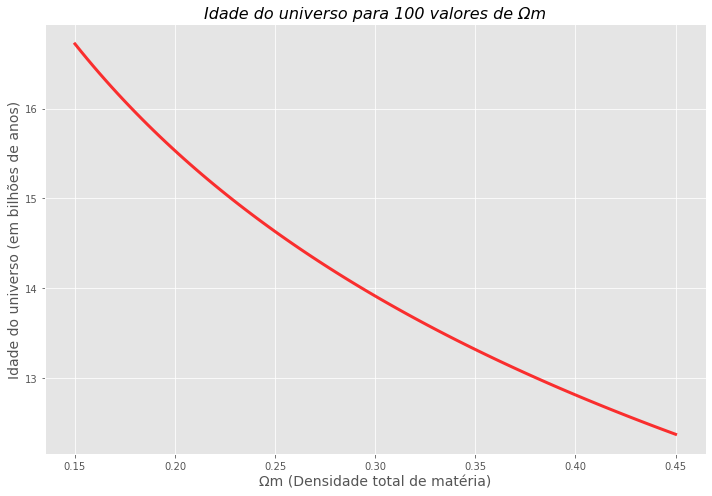

In [189]:
if __name__ == '__main__':
    main()

Quanto maior o valor da constante de densidade, mais perto o universo está do seu "ano de nascimento". Isso se deve a teoria de que o universo se iniciou a partir de um estado extremamente quente e denso no qual toda a matéria estava concentrada em um espaço infinitamente pequeno. Logo, como a densidade da matéria é diretamente proporcional à massa, a constante de densidade terá um valor bastante alto no evento do Big-Bang. Portanto, conforme o valor do ômega cresce no gráfico, a idade diminui, pois está se aproximando cada vez mais do seu estado inicial.